In [1]:
import pandas as pd

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
def set_xaxis(ax, n_x):
    x_ticks_major= []
    x_ticks_minor= []
    x_labels_minor= []
    x_labels_major= []
    m_empty_string= ''
    for i in xrange(n_x):
        m_time_minute= 5 * (i + 1)
        m_minute_string= '{}M'.format(m_time_minute).zfill(5)
        if m_time_minute % 60 == 0:
            m_hour= m_time_minute / 60
            m_hour_string= '{}H'.format(m_hour).zfill(3)
            x_ticks_major.append(float(i))
            x_labels_major.append(m_hour_string)
        else:
            x_ticks_minor.append(float(i))
            x_labels_minor.append(m_minute_string)
    ax.set_xticks(x_ticks_minor, minor=True)
    ax.set_xticks(x_ticks_major, minor=False)
    ax.set_xticklabels(x_labels_major, minor=False, rotation=65)
    ax.grid(True, which='major')

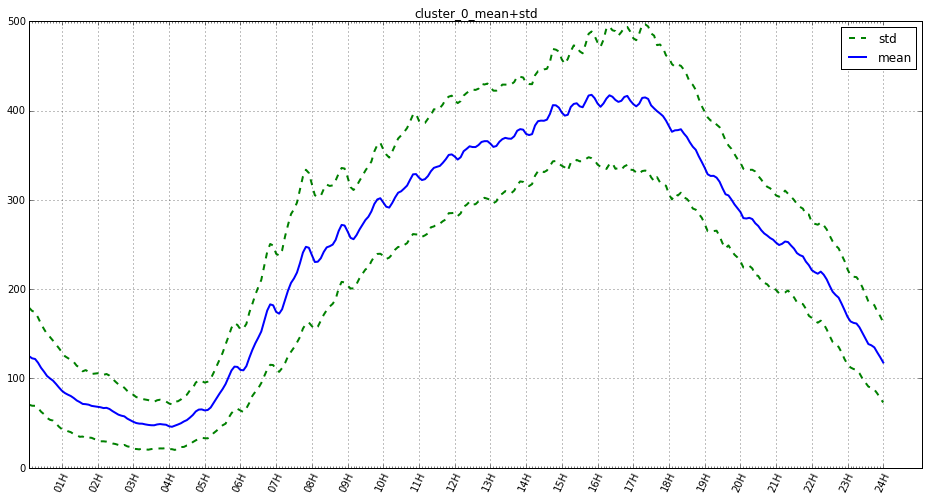

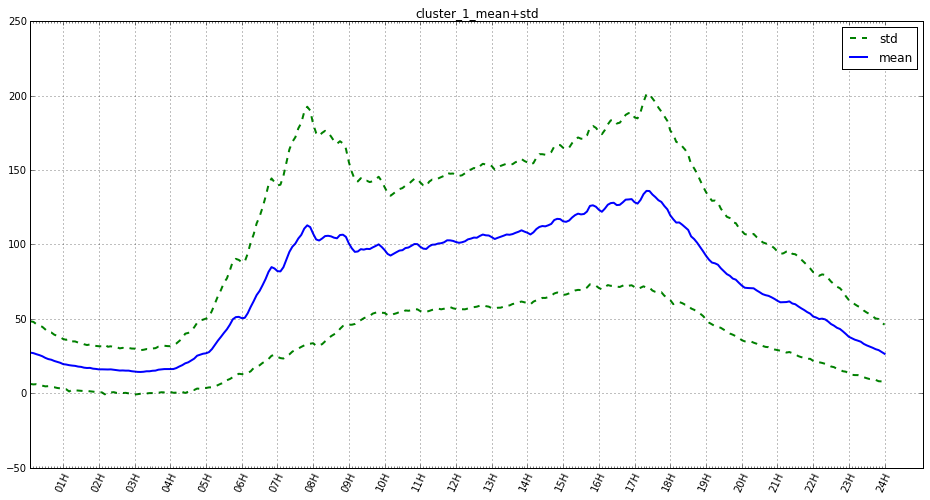

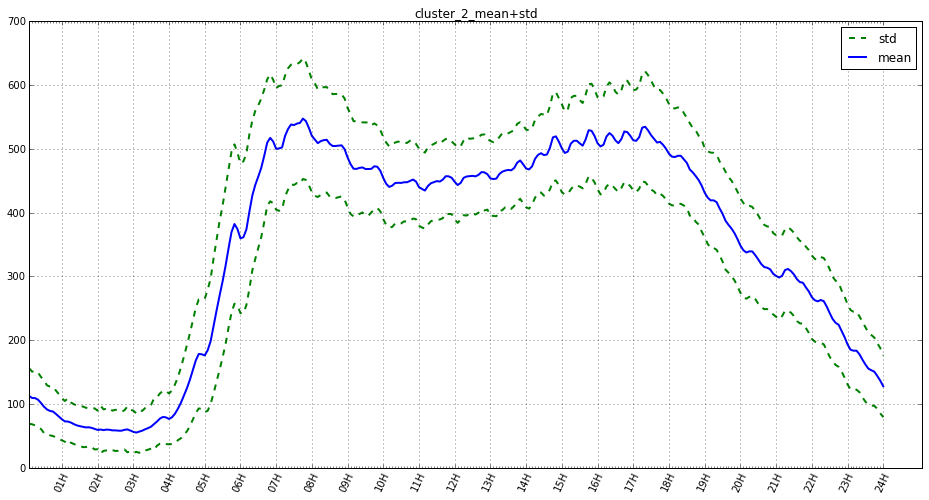

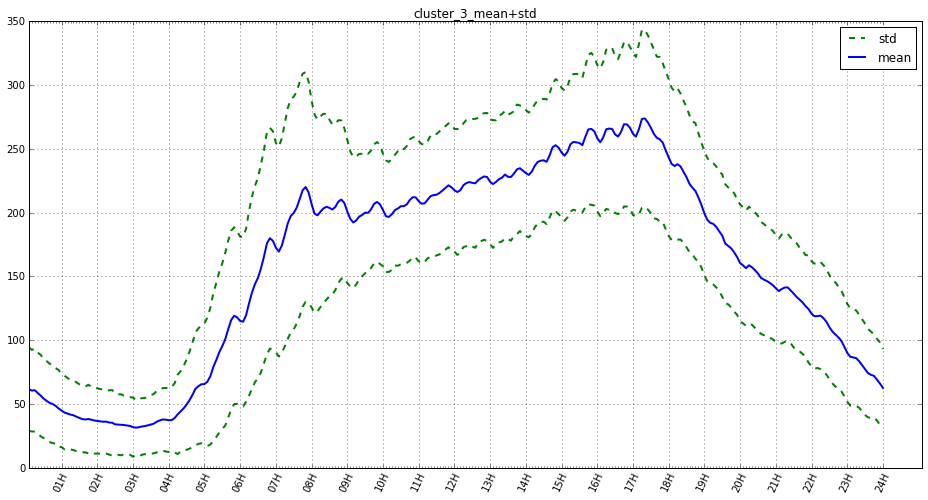

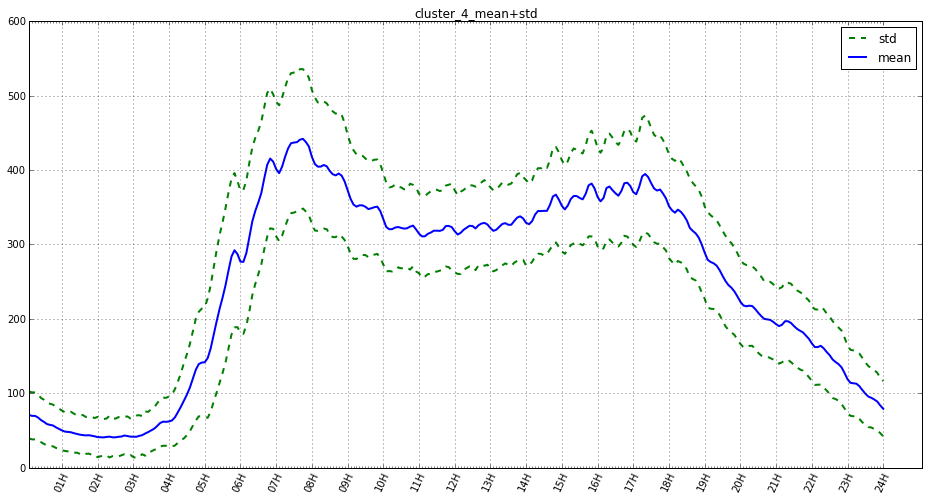

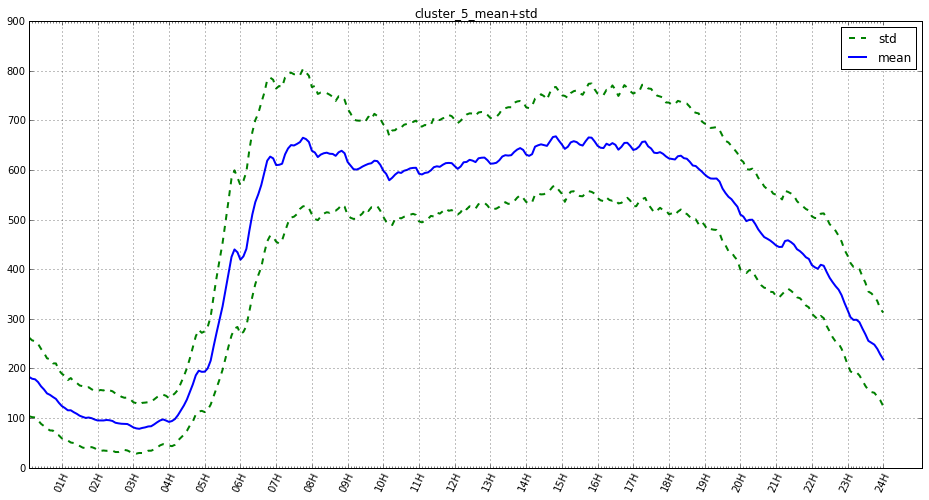

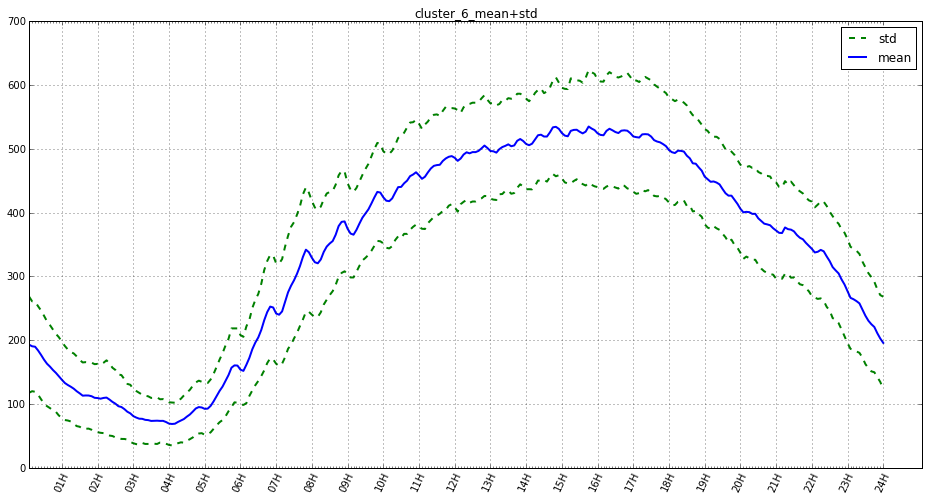

In [4]:
clusters= ["cluster_{}".format(i) for i in xrange(0,7)]
for c in clusters:
    df= pd.read_csv('/var/tmp/total_flow_{}_label_stats.test_kmeans.csv'.format(c), header= None)
    m_mean_vector= df.iloc[0].values
    m_std_vector= np.sqrt(df.iloc[1]).values
    #
    msub_vec= m_mean_vector - m_std_vector
    madd_vec= m_mean_vector + m_std_vector
    #
    fig, ax= plt.subplots(figsize=(16,8))
    ax.plot(msub_vec, c='green', ls='dashed', lw=2.0, label='std')
    ax.plot(m_mean_vector, c='blue', lw=2.0, label='mean')
    ax.plot(madd_vec, c='green', ls='dashed', lw=2.0)
    ax.legend()
    #
    m_title= '{}_mean+std'.format(c)
    ax.set_title(m_title)
    #
    set_xaxis(ax, len(m_mean_vector))
    #
    m_output_filename= '{}.pdf'.format(m_title)
    fig.savefig(m_output_filename)